### Read data

In [2]:
!pip install duckdb
import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# to use a database file (not shared between processes)
#con = duckdb.connect(database='/content/drive/MyDrive/projecteADSDB/trusted/trusted.duckdb', read_only=False)
con = duckdb.connect(database='./trusted/trusted.duckdb', read_only=False)
print(con.execute('SELECT 1').fetchall())

[(1,)]


# Outlier detection
## Visualization



In [5]:
import seaborn as sns
from IPython import display
import time

def outlierVisualization(df):
  numdf = df.select_dtypes(include=np.number)
  numdf.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
  )

  # increase spacing between subplots
  plt.subplots_adjust(wspace=0.5) 
  plt.show()


def outlierRemoving(df):
  numdf = df.select_dtypes(include=np.number)
  print('before... ', df.size)
  for col in numdf:
    q = df[col].quantile(0.99)
    df = df[numdf[col] < q]
  print('after... ', df.size)
  return df
  


Outlier visualization

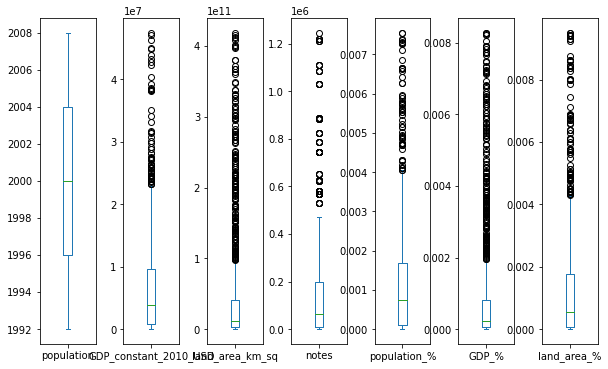

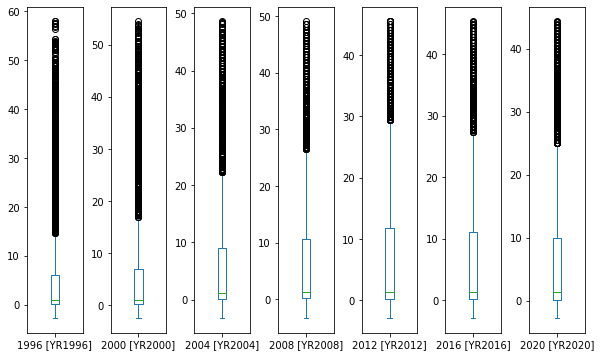

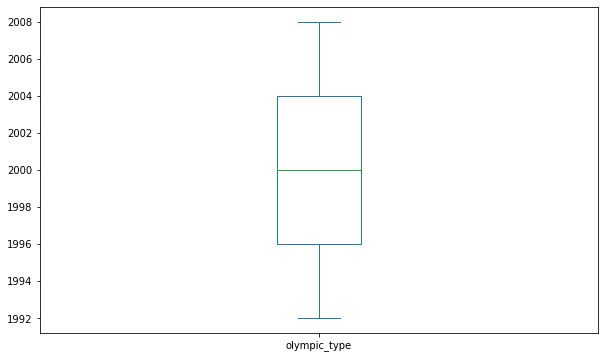

In [15]:
l = con.execute("SHOW TABLES").fetchall()
tables = list([t for (t,) in l])

dictds = {}

for ds in tables:
  # table as dataframe
  df = con.execute(f'SELECT * FROM {ds}').df()
  dictds[ds] = df
  # apply function
  outlierVisualization(dictds[ds])
  

### Outlier removal 

In [16]:
for ds in tables:
  # apply function
  df = outlierRemoving(dictds[ds])
  dictds[ds] = df
  # replace table with new imputed one
  con.execute(f'DROP TABLE IF EXISTS {ds};')
  con.execute(f'CREATE TABLE IF NOT EXISTS {ds} AS SELECT * FROM df;')



before...  12597
after...  9893
before...  57904
after...  53856
before...  71487
after...  59124


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


### Visualize the results

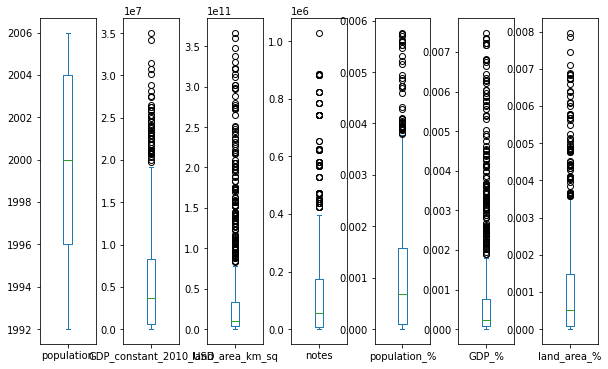

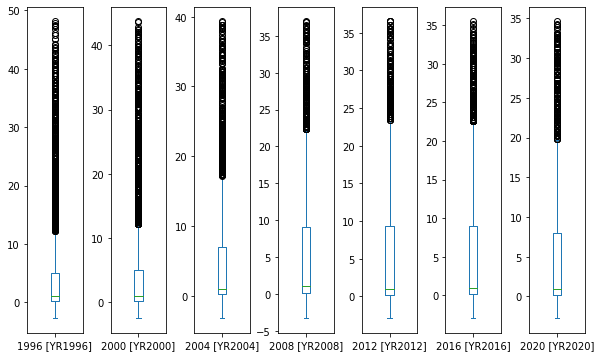

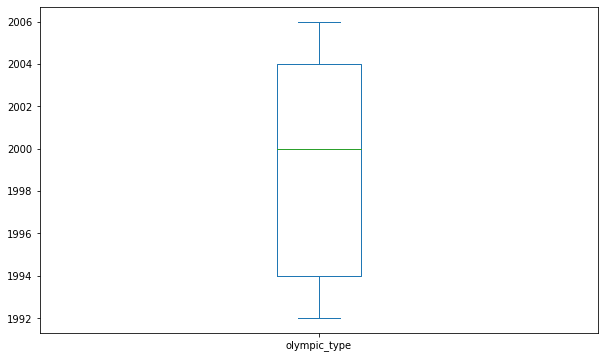

In [17]:
for ds in tables:
  # apply function
  outlierVisualization(dictds[ds])
  

In [18]:
con.execute("SHOW TABLES").fetchall()

[('Country_Level_Data',), ('Governance_Data',), ('Olympics_Data',)]

Close connection

In [19]:
con.close()